## Análisis exploratorio del dataset

### Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Carga de datos

In [2]:
df = pd.read_csv('data/bbc_data.csv')
df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


### Preprocesamiento de datos

#### Etiquetas de las noticias

In [4]:
unique_labels = df['labels'].unique()
print(unique_labels)

['entertainment' 'business' 'sport' 'politics' 'tech']


#### Cantidad de noticias por categoría

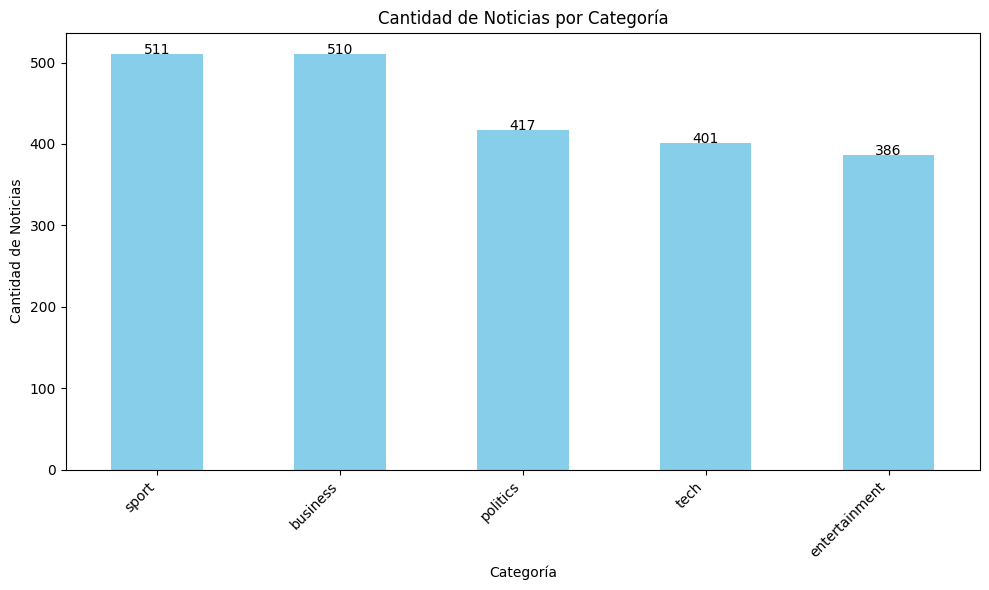

In [18]:
news_count = df['labels'].value_counts()

plt.figure(figsize=(10, 6))
news_count.plot(kind='bar', color='skyblue')

for i, count in enumerate(news_count):
    plt.text(i, count, str(count), ha='center')

plt.title('Cantidad de Noticias por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Noticias')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Word Cloud de las noticias separadas por las diferentes etiquetas

Para tener una idea de las palabras más comunes en cada categoría, se generará un Word Cloud para cada una de las etiquetas.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


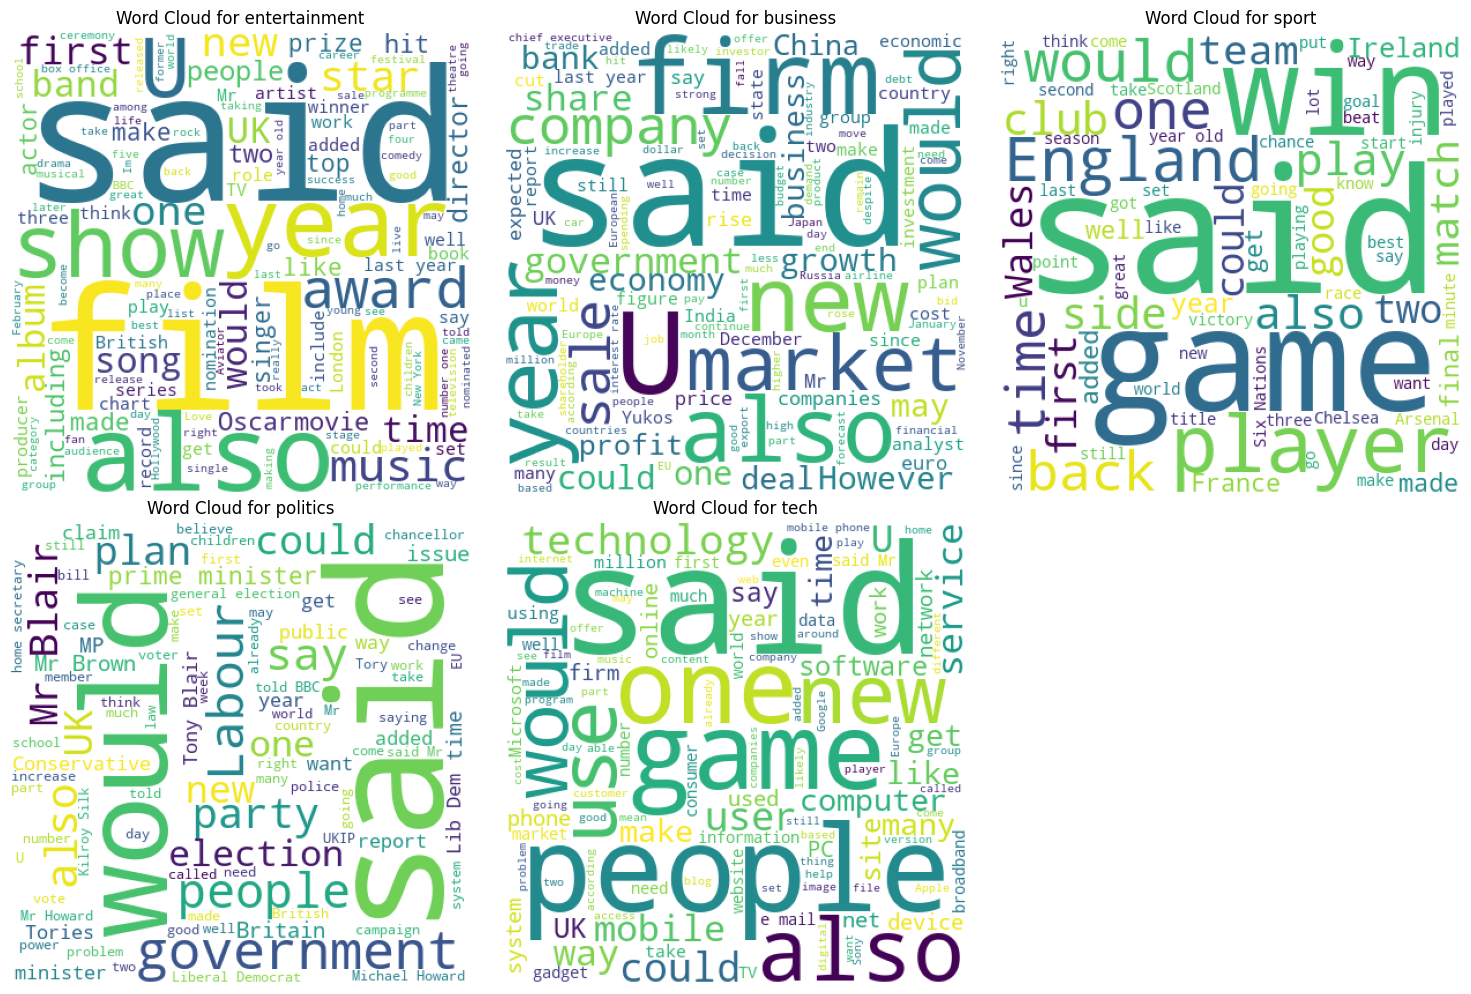

In [13]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
nltk.download('punkt')

unique_labels = df['labels'].unique()

def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminación de stopwords
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    return ' '.join(tokens)

plt.figure(figsize=(15, 10))

for i, label in enumerate(unique_labels, 1):
    subset = df[df['labels'] == label]
    combined_text = ' '.join(subset['data'])
    processed_text = preprocess_text(combined_text)
    
    
    wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                          stopwords = stopwords.words('english'), min_font_size = 10).generate(processed_text)

    output_path = os.path.join('images', f"wordcloud_{label}.png")
    wordcloud.to_file(output_path)
    
    plt.subplot(2, 3, i)
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.title(f"Word Cloud for {label}")

plt.tight_layout()
plt.show()